# IoT·인공지능·빅데이터 개론 및 실습 <br> 9/16 Logistic Regerssion & Neural Network with Scikit-Learn

Adapted by Seonwoo Min from the "An Introduction to Machine Learning with Scikit-learn" tutorial (http://scikit-learn.org/stable/tutorial/basic/tutorial.html).

In this excercise, we will cover:

* Loading an example dataset & preprocessing
* Logistic regression & neural network models in scikit-learn
* Model training & prediction & evaluation
* Model save & load
* Homework

## 1. Loading an example dataset & preprocessing

In [3]:
from sklearn.datasets import load_digits
data = load_digits()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [4]:
# Data shape & statistics
print("Data: ", data['data'].shape)
print("Label:", data['target'].shape)

# Print the number of samples for each class
import numpy as np
#################### To Do #################################
print(np.unique(data['target']))
for num in range(10):
  print('%d %d' %(num, np.sum(data['target']==num)))
############################################################

Data:  (1797, 64)
Label: (1797,)
[0 1 2 3 4 5 6 7 8 9]
0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


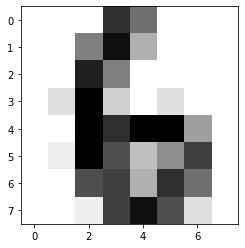

In [5]:
#############################################################
# Data Visaulization
#############################################################
import matplotlib.pyplot as plt
%matplotlib inline

#################### To Do #################################
plt.imshow(data['data'][272].reshape(8,8), cmap=plt.cm.gray_r)

############################################################

In [6]:
#############################################################
# 1st Preprocessing
# Use the first 20 samples in each clss as test data
# Use the others as training data
#############################################################

#################### To Do #################################
test_data = []
train_data = []
test_target = []
train_target = []
N = len(data['data'])
for c in range(10) :
  is_in_this_class = data['target'] == c

  data_in_this_class = data['data'][is_in_this_class]
  target_in_this_class = data['target'][is_in_this_class]

  test_data.append(data_in_this_class[:20])
  train_data.append(data_in_this_class[20:])
  test_target.append(target_in_this_class[:20])
  train_target.append(target_in_this_class[20:])

test_data = np.concatenate(test_data)
train_data = np.concatenate(train_data)
test_target = np.concatenate(test_target)
train_target = np.concatenate(train_target)

############################################################

print(test_data.shape)
print(train_data.shape)

(200, 64)
(1597, 64)


In [7]:
#############################################################
# 2nd Preprocessing
# Let's use only 2 and 3 for binary classification
#############################################################

#################### To Do #################################


test_data23 = []
train_data23 = []
test_target23 = []
train_target23 = []
N = len(data['data'])
for c in [2,3] :
  is_in_this_class = data['target'] == c
  data_in_this_class = data['data'][is_in_this_class]
  target_in_this_class = data['target'][is_in_this_class]

  test_data23.append(data_in_this_class[:20])
  train_data23.append(data_in_this_class[20:])
  test_target23.append(target_in_this_class[:20])
  train_target23.append(target_in_this_class[20:])

test_data23 = np.concatenate(test_data23)
train_data23 = np.concatenate(train_data23)
test_target23 = np.concatenate(test_target23)
train_target23 = np.concatenate(train_target23)
############################################################

print(test_data23.shape)
print(train_data23.shape)

(40, 64)
(320, 64)


## 2. Logistic regression & neural network models in scikit-learn

For full documentations refer to the following links: <br>
Logistic Regression: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
Neural network: http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

LR = LogisticRegression(max_iter=1000, solver='sag')
NN = MLPClassifier(hidden_layer_sizes=(10), activation='relu', learning_rate_init=0.01, max_iter=1000)

## 3. Model training & prediction & evaluation

In [9]:
#############################################################
# Logistic regression model
#############################################################
# Training
LR = LogisticRegression(max_iter=2, solver='sag')
LR.fit(train_data23, train_target23)

# Prediction
train_predict23 = LR.predict(train_data23)
test_predict23 = LR.predict(test_data23)
print("test_target     :", test_target23)
print("test_prediction :", test_predict23)

#################### To Do #################################
train_prob23 = LR.predict_proba(train_data23)
test_prob23 = LR.predict_proba(test_data23)
acc_train = train_target23==train_predict23
acc_test = test_target23==test_predict23
train_acc23 = np.mean(acc_train)
test_acc23 = np.mean(acc_test)
############################################################
#print(train_prob23)
#print(test_prob23)
print("train_acc :", train_acc23)
print("test_acc  :", test_acc23)

test_target     : [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]
test_prediction : [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]
train_acc : 1.0
test_acc  : 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [10]:
#############################################################
# Neural network model
#############################################################
# Training
NN = MLPClassifier(hidden_layer_sizes=(10), activation='relu', learning_rate_init=0.01, max_iter=10)
NN.fit(train_data23, train_target23)

# Prediction
train_predict23 = NN.predict(train_data23)
test_predict23 = NN.predict(test_data23)
print("test_target     :", test_target23)
print("test_prediction :", test_predict23)

#################### To Do #################################
train_prob23 = NN.predict_proba(train_data23)
test_prob23 = NN.predict_proba(test_data23)
acc_train = train_target23==train_predict23
acc_test = test_target23==test_predict23
train_acc23 = np.mean(acc_train)
test_acc23 = np.mean(acc_test)
############################################################
#print(train_prob23)
#print(test_prob23)
print("train_acc :", train_acc23)
print("test_acc  :", test_acc23)

test_target     : [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]
test_prediction : [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3
 3 3 3]
train_acc : 0.9875
test_acc  : 0.975


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## 4. Model save & load

In [11]:
# from sklearn.externals import joblib
import joblib
import os

if not os.path.exists('models'):
    os.makedirs('models')
    
# save
joblib.dump(NN, 'models/NN23.joblib') 

# load
NN_load = joblib.load('models/NN23.joblib') 

#################### To Do #################################

############################################################

## 5. Homework
Now it's your job to experiment with models and achieve higher accuracy on the  **<font color=red>on the entire dataset</font>**. <br>
Try different hyperparameter configurations and save the final model as "final_model.joblib" <br>
Submit the current **notebook file and the saved final model** on ETL.
* Maximum 10 points for >= 97% accuracy on the test set
* Maximum 8 points for >= 96% accuracy on the test set
* Maximum 6 points for >= 95% accuracy on the test set
* Maximum 4 points for >= 94% accuracy on the test set

In [66]:
#############################################################
# Try different hyperparameters
# Final model training
#############################################################

#################### To Do #################################
'''
for _ in range(6) :
  for k in [100,1000] :
    for i in [100,1000] :
      for j in [0.001, 0.0005, 0.0015] :
        NN = MLPClassifier(hidden_layer_sizes=(100,i), activation='relu', solver='adam', learning_rate_init=j, max_iter=1000)
        NN.fit(train_data, train_target)

        import joblib
        import os

        if not os.path.exists('models'):
            os.makedirs('models')
            
        # save
        joblib.dump(NN, 'models/NN_Homework.joblib') 
        # load
        NN_load = joblib.load('models/NN_Homework.joblib')

        # Prediction
        train_predict = NN_load.predict(train_data)
        test_predict = NN_load.predict(test_data)
        #print("test_target     :", test_target)
        #print("test_prediction :", test_predict)

        # obtain test accuracy
        acc_train = train_target==train_predict
        acc_test = test_target==test_predict
        train_acc = np.mean(acc_train)
        test_acc = np.mean(acc_test)
        print('Hidden Layer : (%d,%d)\nLearning rate : %f'%(k,i,j))
        print("train_acc :", train_acc)
        print("test_acc  :", test_acc)
        print("")
'''
NN = MLPClassifier(hidden_layer_sizes=(1000,10000), activation='relu', solver = 'adam', learning_rate_init = 0.0005, max_iter = 1000)
NN.fit(train_data, train_target)
import joblib
import os

if not os.path.exists('models'):
    os.makedirs('models')
    
# save
joblib.dump(NN, 'models/final_model.joblib') 

############################################################

['models/final_model.joblib']

In [67]:
#############################################################
# Final model test
# Load the final model and obatin the test accuracy
#############################################################

#################### To Do #################################
# load
NN_load = joblib.load('models/final_model.joblib')

# Prediction
train_predict = NN_load.predict(train_data)
test_predict = NN_load.predict(test_data)
#print("test_target     :", test_target)
#print("test_prediction :", test_predict)

# obtain test accuracy
acc_train = train_target==train_predict
acc_test = test_target==test_predict
train_acc = np.mean(acc_train)
test_acc = np.mean(acc_test)

print("train_acc :", train_acc)
print("test_acc  :", test_acc)

############################################################

train_acc : 1.0
test_acc  : 0.975


### Describe what you did here
In this cell you should also write an explanation of what you did, any additional features that you implemented, and any visualizations or graphs that you make in the process of training and evaluating your model.
* Maximum 10 points

먼저, relu함수보다 tanh 함수의 classifying 능력이 더 뛰어나다는 모델의 적절한 은닝층 shape과 learning rate를 찾아봤다.

# Test 1
Hidden Layer : (100,100)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.94

Hidden Layer : (100,100)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.94

Hidden Layer : (100,100)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.945

Hidden Layer : (100,1000)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.95

Hidden Layer : (100,1000)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.95

Hidden Layer : (100,1000)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.935

Hidden Layer : (1000,100)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.95

Hidden Layer : (1000,100)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.95

Hidden Layer : (1000,100)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.945

Hidden Layer : (1000,1000)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.935

Hidden Layer : (1000,1000)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.955

Hidden Layer : (1000,1000)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.95

# Test 2

Hidden Layer : (100,100)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.935

Hidden Layer : (100,100)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.955

Hidden Layer : (100,100)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.925

Hidden Layer : (100,1000)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.92

Hidden Layer : (100,1000)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.95

Hidden Layer : (100,1000)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.95

Hidden Layer : (1000,100)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.945

Hidden Layer : (1000,100)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.94

Hidden Layer : (1000,100)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.935

Hidden Layer : (1000,1000)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.955

Hidden Layer : (1000,1000)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.97

Hidden Layer : (1000,1000)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.94

# Test 3

Hidden Layer : (100,100)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.965

Hidden Layer : (100,100)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.935

Hidden Layer : (100,100)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.95

Hidden Layer : (100,1000)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.945

Hidden Layer : (100,1000)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.93

Hidden Layer : (100,1000)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.95

Hidden Layer : (1000,100)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.95

Hidden Layer : (1000,100)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.945

Hidden Layer : (1000,100)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.93

Hidden Layer : (1000,1000)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.93

Hidden Layer : (1000,1000)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.945

Hidden Layer : (1000,1000)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.93

# Test 4

Hidden Layer : (100,100)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.93

Hidden Layer : (100,100)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.925

Hidden Layer : (100,100)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.945

Hidden Layer : (100,1000)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.945

Hidden Layer : (100,1000)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.975

Hidden Layer : (100,1000)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.945

Hidden Layer : (1000,100)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.935

Hidden Layer : (1000,100)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.92

Hidden Layer : (1000,100)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.945

Hidden Layer : (1000,1000)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.945

Hidden Layer : (1000,1000)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.96

Hidden Layer : (1000,1000)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.945

# Test 5

Hidden Layer : (100,100)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.94

Hidden Layer : (100,100)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.935

Hidden Layer : (100,100)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.925

Hidden Layer : (100,1000)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.945

Hidden Layer : (100,1000)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.94

Hidden Layer : (100,1000)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.955

Hidden Layer : (1000,100)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.92

Hidden Layer : (1000,100)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.955

Hidden Layer : (1000,100)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.925

Hidden Layer : (1000,1000)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.945

Hidden Layer : (1000,1000)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.94

Hidden Layer : (1000,1000)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.96

# Test 6

Hidden Layer : (100,100)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.93

Hidden Layer : (100,100)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.925

Hidden Layer : (100,100)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.93

Hidden Layer : (100,1000)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.96

Hidden Layer : (100,1000)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.94

Hidden Layer : (100,1000)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.96

Hidden Layer : (1000,100)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.925

Hidden Layer : (1000,100)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.93

Hidden Layer : (1000,100)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.945

Hidden Layer : (1000,1000)
Learning rate : 0.001000
train_acc : 1.0
test_acc  : 0.935

Hidden Layer : (1000,1000)
Learning rate : 0.000500
train_acc : 1.0
test_acc  : 0.925

Hidden Layer : (1000,1000)
Learning rate : 0.001500
train_acc : 1.0
test_acc  : 0.955<br>



위와 같이 총 6번의 test를 진행 후에, 한번이라도 0.97 이상의 accuracy를 보인 (100,1000)과 (1000,1000)의 Shape, 그리고 0.0005의 learning rate 중에서, 평균적으로 더 높은 accuracy를 보인 (1000,1000)의 shape을 채택했다. <br>
그러나 이후 몇번의 반복되는 accuracy 측정에서도,<br> 
accuracy가 각각 0.925, 0.95, 0.975, 0.95, 0.95로 정확도 평균이 0.95쯤 밖에 되지 않았다.<br>
각각 1000개의 뉴런을 가지는 레이어의 수를 다섯개까지도 늘려봤으나 <br>
레이어수 3개 : 0.90, 0.92, 0.95<br>
레이어수 4개 : 0.935, 0.95, 0.94<br>
레이어수 5개 : 0.94, 0.92, 0.94<br>
위와 같이 정확도가 늘어나지 않아서,<br>
은닉층의 두번쨰 레이어의 뉴런 수를 10000으로 크게 늘려봤다.<br>
그랬더니 총 4번의 test에서 0.975, 0.95, 0.97, 0.975의  높은 정확도를 가지게 되어서, 이를 final model로 정했다.

